# Visualising the temporal mean GlobCurrent velocities

*Author: Miriam Sterl*

We compute the temporal mean of the flow fields from the GlobCurrent data set between 2002-2014. Then we plot the magnitudes of these means for all locations on the globe.

In [1]:
from netCDF4 import Dataset
import numpy as np
import numpy.ma as ma
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

In [2]:
meanU = np.load('/science/projects/oceanparcels/output_data/data_Miriam/MeanU')
meanV = np.load('/science/projects/oceanparcels/output_data/data_Miriam/MeanV')
meanvel = np.sqrt(np.square(meanU)+np.square(meanV)) # in m/s

In [3]:
# Get longitude and latitude data
File = '/science/projects/oceanparcels/input_data/DataPlasticTides/GlobCurrent/20020101-GLOBCURRENT-L4-CUReul_hs-ALT_SUM-v03.0-fv01.0.nc'
dataset = Dataset(File)
lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]

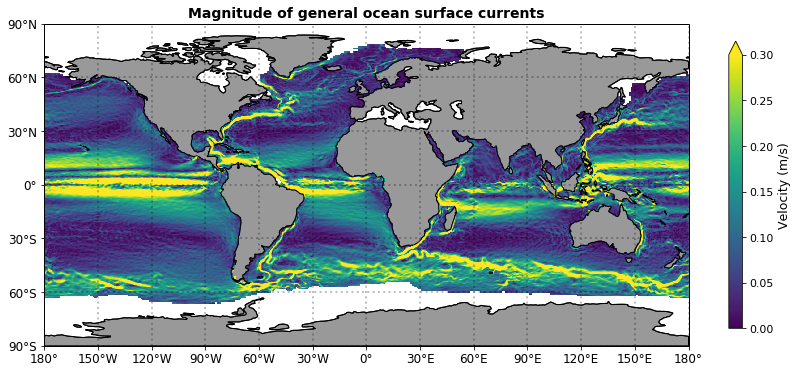

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6), subplot_kw={'projection': ccrs.PlateCarree()})
Lon, Lat = np.meshgrid(lon, lat)
velplot = ax.pcolormesh(Lon, Lat, meanvel, cmap='viridis', vmin=0, vmax=0.3) 
ax.coastlines()
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black', facecolor=(0.6,0.6,0.6))
ax.set_xticks([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], crs=ccrs.PlateCarree())
ax.set_xticklabels([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], fontsize=12)
ax.set_yticks([-90, -60, - 30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax.set_yticklabels([-90, -60, - 30, 0, 30, 60, 90], fontsize=12)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.grid(linewidth=2, color='black', alpha=0.25, linestyle=':')
cbar = fig.colorbar(velplot, shrink=0.7, extend='max')
cbar.set_label("Velocity (m/s)", rotation=90, fontsize=12.5)
cbar.ax.tick_params(labelsize=11)
plt.title('Magnitude of general ocean surface currents', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
#plt.savefig('GC_Velocity.png')